### TC5035.10 Proyecto Integrador
 
Dra. Grettel Barceló Alonso
Dr. Luis Eduardo Falcón Morales
 
**Avance 1. Análisis exploratorio de datos**

**“Modelos para la Optimización de Precios en Estaciones de Autoservicio”**

Liga Github: https://github.com/A01793499-DiegoGuerra/Proyecto-Integrador-Equipo18/tree/main

Diego Fernando Guerra Burgos	A01793499
Esteban Sánchez Retamoza		A01740631
Hansel Zapiain Rodríguez		A00469031
 
Abril 2024

**Objetivos**
2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

2.2 Abordar y corregir los problemas identificados en los das

**Instrucciones**

Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes.

Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
¿Cuáles son las estadísticas resumidas del conjunto de datos?
¿Hay valores atípicos en el conjunto de datos?
¿Cuál es la cardinalidad de las variables categóricas?
¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
¿Hay correlación entre las variables dependientes e independientes?
¿Cómo se distribuyen los datos en función de diferentes categorías?
¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
¿Se deberían normalizar las imágenes para visualizarlas mejor?
¿Hay desequilibrio en las clases de la variable objetivo?
Deberán contar con un repositorio en GitHubLinks to an external site., para compartir los resultados con el equipo docente. to


***Importar Librerias***

In [1]:
#Importar librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm

In [2]:
%matplotlib inline

***Consolidación de bases***

In [3]:
#carga de bases anuales y unificacón en un mismo archivo
#path = 'C:/Users/DIEGO/Downloads/'# this needs to be changed to the directory of the excel files

#archivos_bd = [f'{path}VENTAS 2022.xlsx', f'{path}VENTAS 2023.xlsx', f'{path}VENTAS 2024.xlsx']

#df = pd.DataFrame()

#for file in archivos_bd:
#    year_db = pd.read_excel(file, skiprows=6)
#    df = df.append(year_db, ignore_index = True)

#df.to_pickle(f'{path}base_ventas_combinada.pkl')

***Carga de Bases***

In [4]:
df_sales = pd.read_pickle('base_ventas_combinada.pkl')
df_sales.head()

,Fecha,Hora,Despacho,Posición,Producto,Cantidad,Precio,Importe,Despachador,Nota,Factura,Cliente,Código,Tipo,Vehículo,Placas,Datos,Fecha Factura
0,2022-01-01 00:00:00,00:11:00,3042508-0,4.0,MAGNA,9.798,19.29,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2022-01-01 00:00:00,00:18:00,3042509-0,3.0,PREMIUM,33.748,22.49,759.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2022-01-01 00:00:00,00:20:00,3042510-0,3.0,MAGNA,9.798,19.29,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2022-01-01 00:00:00,00:25:00,3042511-0,4.0,MAGNA,14.723,19.29,284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2022-01-01 00:00:00,00:30:00,3042512-0,4.0,MAGNA,9.798,19.29,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


***Información Básica***

In [5]:
#Vamos a ver la definición de tipos generales
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865483 entries, 0 to 865482
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Fecha          865483 non-null  object        
 1   Hora           865480 non-null  object        
 2   Despacho       865480 non-null  object        
 3   Posición       865480 non-null  float64       
 4   Producto       865480 non-null  object        
 5   Cantidad       865483 non-null  float64       
 6   Precio         865480 non-null  float64       
 7   Importe        865483 non-null  float64       
 8   Despachador    316713 non-null  object        
 9   Nota           318425 non-null  float64       
 10  Factura        55320 non-null   object        
 11  Cliente        228895 non-null  object        
 12  Código         83411 non-null   float64       
 13  Tipo           83487 non-null   object        
 14  Vehículo       55699 non-null   float64       
 15  

Disponemos de una base de 18 variables. Con una simple observación del conteo de datos, observamos que aproximadamente 8 variables cuentan con la presencia de un porcentaje alto de datos faltantes (en la siguiente sección analizaremos la presencia de datos faltantes). También tenemos dos variables (Fecha y Hora) las cuales deben ser cambiadas a formato DATETIME para poder analizar componentes temporales. En cuanto a la variable Posición, que es una variable categórica y tiene formato de una variable numérica, debe ser cambiada para reflejar el verdadero tipo de dato.

In [6]:
#Vamos a ver un analisis global de las variables
df_sales.describe()

,Posición,Cantidad,Precio,Importe,Nota,Código,Vehículo,Fecha Factura
count,865480.000000,8.654830e+05,865480.000000,8.654830e+05,3.184250e+05,8.341100e+04,55699.000000,30010
mean,4.404685,3.427516e+01,21.321077,7.426958e+02,8.889339e+05,5.674994e+05,1.219573,2023-09-06 03:33:28.850383104
min,1.000000,0.000000e+00,19.290000,0.000000e+00,5.502240e+05,1.000000e+00,1.000000,2023-01-02 00:00:00
25%,3.000000,7.070000e+00,20.490000,1.500000e+02,6.300400e+05,9.510000e+02,1.000000,2023-05-10 00:00:00
50%,4.000000,1.000000e+01,21.190000,2.000000e+02,7.098530e+05,1.019010e+05,1.000000,2023-09-06 00:00:00
75%,6.000000,2.110000e+01,21.990000,4.590000e+02,7.896380e+05,1.033630e+05,1.000000,2024-01-04 00:00:00
max,12.000000,6.975194e+06,25.990000,1.492424e+08,3.907810e+07,2.020499e+07,21.000000,2024-05-02 00:00:00
std,2.294295,1.011731e+04,1.236502,2.185659e+05,2.454932e+06,3.116066e+06,1.282375,NaN


***Información datos faltantes o NA***

In [7]:
#Calculando data faltante en la base de datos por columna
missing_percentage_per_column = (df_sales.isnull().mean() * 100).round(2)
print("Presencia de datos faltantes por dimensión (en porcentaje):")
print(missing_percentage_per_column)

Presencia de datos faltantes por dimensión (en porcentaje):
Fecha             0.00
Hora              0.00
Despacho          0.00
Posición          0.00
Producto          0.00
Cantidad          0.00
Precio            0.00
Importe           0.00
Despachador      63.41
Nota             63.21
Factura          93.61
Cliente          73.55
Código           90.36
Tipo             90.35
Vehículo         93.56
Placas           93.56
Datos            63.45
Fecha Factura    96.53
dtype: float64


En este caso, los datos de venta principales como la fecha de transacción, cantidad de combustible, tipo de combustible, precio, entre otros, no registran valores faltantes. La gran mayoría de datos faltantes se observan en información del cliente como tipo de vehículo, el nombre, placas, etc. En este caso, los patrones de ausencia se deben a la falta de recolección o estandarización de este tipo de datos por parte de la gasolinera.

***Estadísticas de las variables***

In [8]:
#Datos únicos por columna
unique_values_per_column = df_sales.nunique()
unique_values_per_column

Fecha               852
Hora               1440
Despacho         865480
Posición             12
Producto              3
Cantidad          24275
Precio               30
Importe           62689
Despachador          36
Nota             318419
Factura           20457
Cliente            3106
Código             1803
Tipo                  3
Vehículo             15
Placas               65
Datos              7324
Fecha Factura       431
dtype: int64

In [9]:
print('Identificación de manguera dispensadora:')
print(df_sales['Posición'].value_counts())

Identificación de manguera dispensadora:
Posición
4.0     172440
2.0     129797
6.0     122274
3.0     113981
5.0      84922
1.0      82736
8.0      67851
7.0      53602
10.0     20932
9.0      16932
12.0         7
11.0         6
Name: count, dtype: int64


En nuestra base disponemos de dos variables categóricas que no registran datos faltantes. La primera hace referencia a la posición de compra, es decir, el número de manguera dispensadora de combustible y el otro hace referencia al tipo de combustible que fue vendido, en este caso esta variable cuenta con 3 categorías.

In [10]:
print('Tipo de Combustible vendido:')
print(df_sales['Producto'].value_counts())

Tipo de Combustible vendido:
Producto
 MAGNA      752231
 PREMIUM     75372
 DIESEL      37877
Name: count, dtype: int64


***Presencia de valores atípicos***

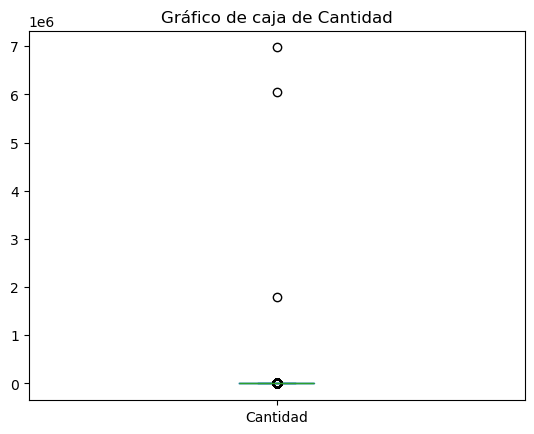

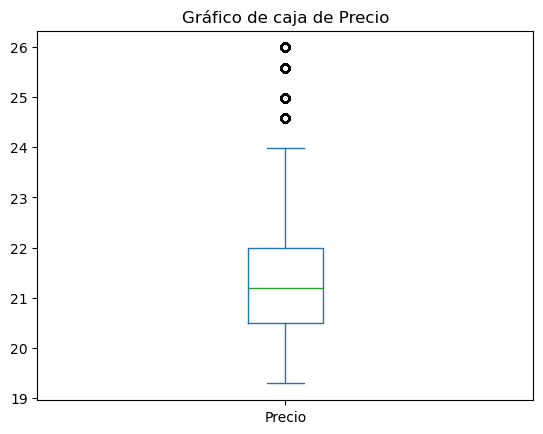

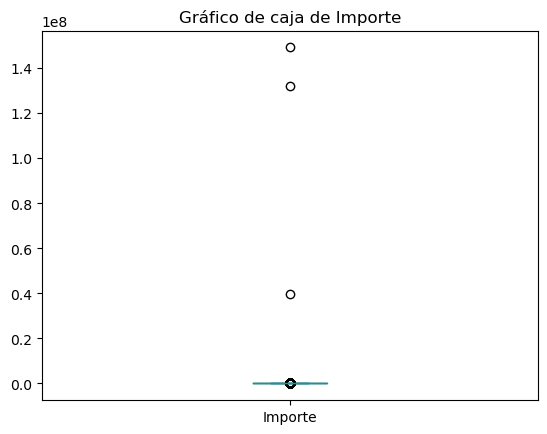

In [11]:
columnas_numericas = ['Cantidad', 'Precio', 'Importe']

for column in columnas_numericas:
    plt.figure()
    df_sales[column].plot(kind = 'box')
    plt.title(f'Gráfico de caja de {column}')
    plt.show()

Nuestras variables numéricas son Precio, Cantidad e Importe. En estos gráficos de Caja y Densidad podemos observar la presencia de valores atípicos en Cantidad e Importe. Estos datos atípicos reflejan valores demasiado altos, lo cual resulta en que exista una distribución sesgada a la izquierda. Se debería eliminar estos registros para observar la nueva distribución.

En el caso de Precio, podemos observar que existe una distribución ligeramente sesgada a la izquierda, con la presencia de pocos valores atípicos, pero que se encuentran en valores lógicos, a comparación de los valores atípicos en las otras variables.

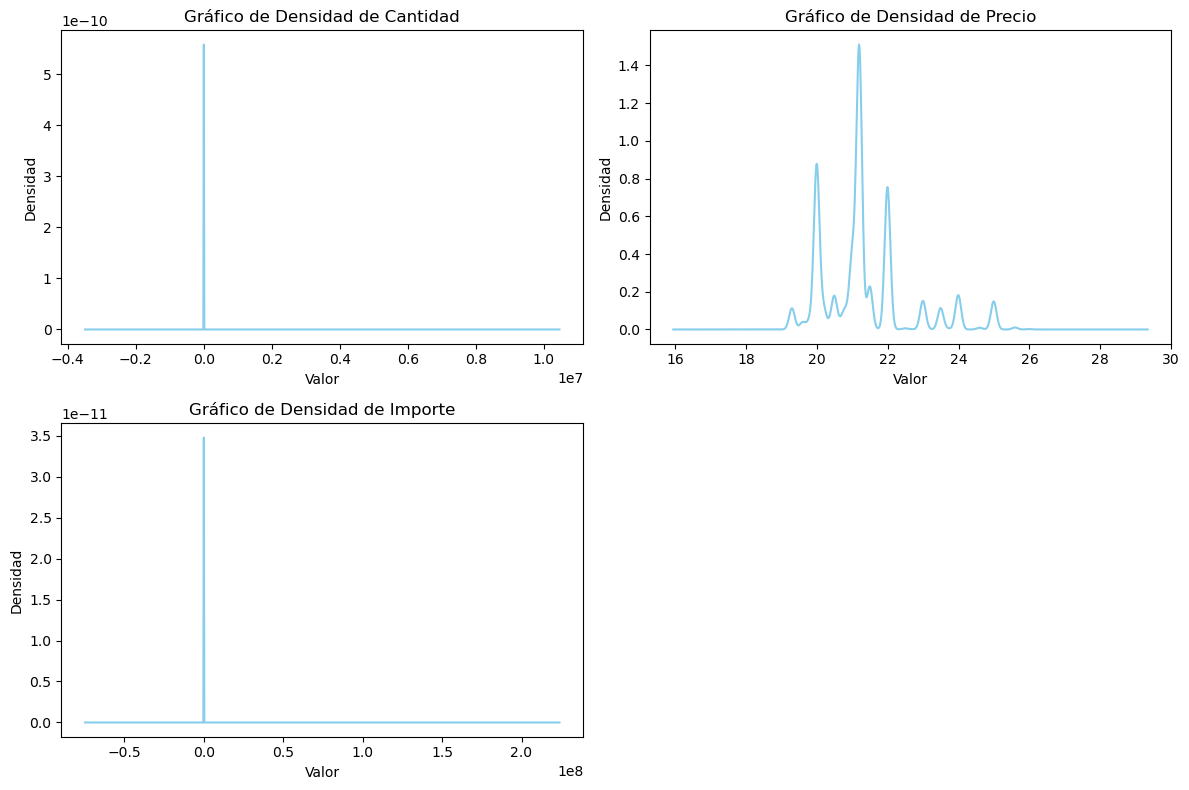

In [12]:
plt.figure(figsize=(12, 8))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    df_sales[columna].plot(kind='density', color='skyblue')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Gráfico de Densidad de {columna}')

plt.tight_layout()

plt.show()

*Tratamiento de valores atípicos*

En este caso podemos observar que existen valores atípicos que tal vez son producto de mal registro por parte de la Gasolinera, lo que resulta en valores demasiado altos. Por ejemplo, el valor máximo de *Cantidad* se ubica en 6 millones de galones por una sola venta (un vehículo promedio se llena con 12 galones). Por lo cual para filtrar estos datos atípicos, vamos a eliminar, solamente para este análisis exploratorio, el 10% de los datos más altos de la serie de *Cantidad*.

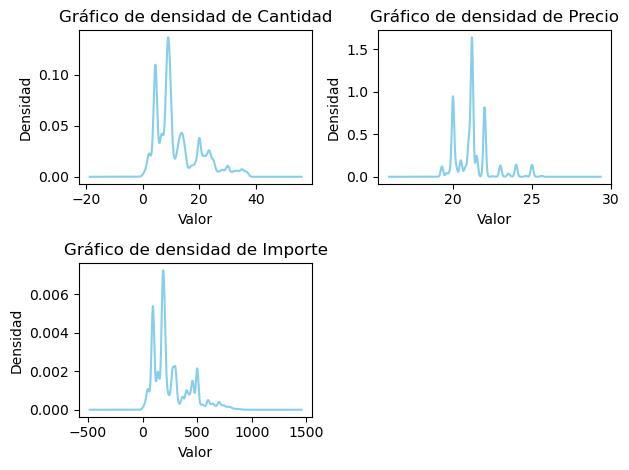

In [13]:
#Filtración de valores atípicos
df_sales_filter = df_sales[df_sales['Cantidad'] <= df_sales['Cantidad'].quantile(0.90)].copy()

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    df_sales_filter[columna].plot(kind='density', color='skyblue')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Gráfico de densidad de {columna}')

plt.tight_layout()
plt.show()

Una vez que filtramos los datos atípicos, observamos que las variables *Cantidad* e *Importe*, tienen una distribución similar, con un ligero sesgo a la izquierda.*.

***Transformación de datos temporales a DATETIME***

Dado que estaremos trabajando con análisis de regresión para estimar demandas es necesario construir todas las estampas de manera que nos permita identificar patrones de demanda esceíficos (i.e. temporalidades)

In [14]:
df_sales_filter['transaction_date'] = pd.to_datetime(df_sales_filter['Fecha'], errors = 'coerce', infer_datetime_format = True)
df_sales_filter['localtime'] = pd.to_timedelta(df_sales_filter['Hora'].astype(str))
df_sales_filter['timeStamp'] = df_sales_filter['transaction_date'] + df_sales_filter['localtime']
df_sales_filter.head()

C:\Users\hzapi\AppData\Local\Temp\ipykernel_69316\3921676319.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales_filter['transaction_date'] = pd.to_datetime(df_sales_filter['Fecha'], errors = 'coerce', infer_datetime_format = True)


,Fecha,Hora,Despacho,Posición,Producto,Cantidad,Precio,Importe,Despachador,Nota,...,Cliente,Código,Tipo,Vehículo,Placas,Datos,Fecha Factura,transaction_date,localtime,timeStamp
0,2022-01-01 00:00:00,00:11:00,3042508-0,4.0,MAGNA,9.798,19.29,189.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-01-01,0 days 00:11:00,2022-01-01 00:11:00
1,2022-01-01 00:00:00,00:18:00,3042509-0,3.0,PREMIUM,33.748,22.49,759.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-01-01,0 days 00:18:00,2022-01-01 00:18:00
2,2022-01-01 00:00:00,00:20:00,3042510-0,3.0,MAGNA,9.798,19.29,189.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-01-01,0 days 00:20:00,2022-01-01 00:20:00
3,2022-01-01 00:00:00,00:25:00,3042511-0,4.0,MAGNA,14.723,19.29,284.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-01-01,0 days 00:25:00,2022-01-01 00:25:00
4,2022-01-01 00:00:00,00:30:00,3042512-0,4.0,MAGNA,9.798,19.29,189.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-01-01,0 days 00:30:00,2022-01-01 00:30:00


In [15]:
df_sales_filter['Hour'] = df_sales_filter['timeStamp'].dt.hour
df_sales_filter['Month'] = df_sales_filter['timeStamp'].dt.month
df_sales_filter['Year'] = df_sales_filter['timeStamp'].dt.year
df_sales_filter['Day of Week'] = df_sales_filter['timeStamp'].dt.dayofweek

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_sales_filter['Day of Week'] = df_sales_filter['Day of Week'].map(dmap)

***Análisis de Temporalidad***

In [16]:
df_timeseries = df_sales_filter[['timeStamp', 'transaction_date', 'Hour', 'Month', 'Year', 'Day of Week', 'Cantidad', 'Producto']].set_index('timeStamp')
df_timeseries.dropna(axis = 1 , inplace = True)
df_timeseries.head()

,transaction_date,Hour,Month,Year,Day of Week,Cantidad,Producto
timeStamp,,,,,,,
2022-01-01 00:11:00,2022-01-01,0,1,2022,Sat,9.798,MAGNA
2022-01-01 00:18:00,2022-01-01,0,1,2022,Sat,33.748,PREMIUM
2022-01-01 00:20:00,2022-01-01,0,1,2022,Sat,9.798,MAGNA
2022-01-01 00:25:00,2022-01-01,0,1,2022,Sat,14.723,MAGNA
2022-01-01 00:30:00,2022-01-01,0,1,2022,Sat,9.798,MAGNA


In [ ]:
print(df_timeseries.isnull().any())

In [ ]:
numeric_cols = df_timeseries.select_dtypes(include=[np.number])
print(np.isinf(numeric_cols).any())

<Axes: xlabel='Day of Week', ylabel='count'>

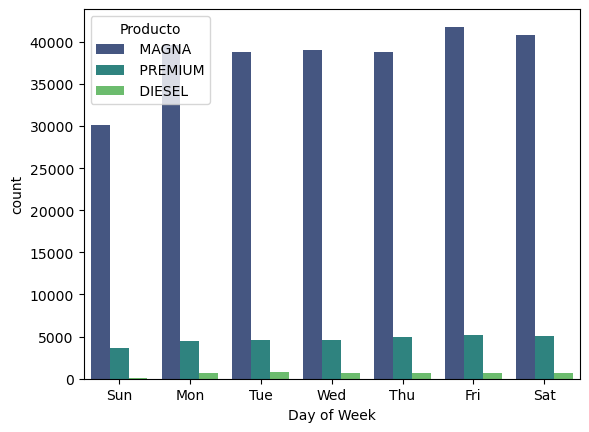

In [17]:
sns.countplot(x = 'Day of Week', hue = 'Producto', data = df_timeseries[df_timeseries['Year'] == 2023], palette = 'viridis')

<Axes: xlabel='Month', ylabel='count'>

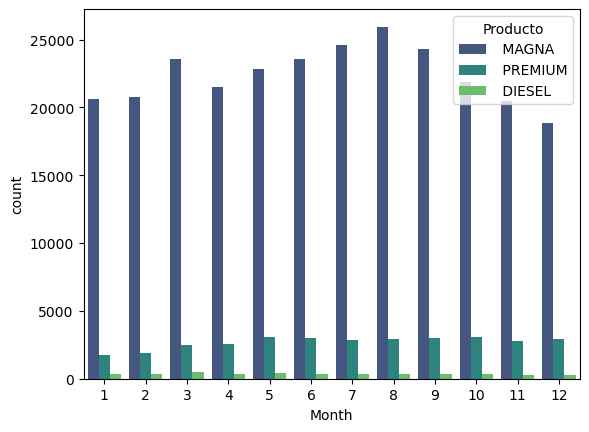

In [18]:
sns.countplot(x = 'Month', hue = 'Producto', data = df_timeseries[df_timeseries['Year'] == 2023], palette = 'viridis')

In [30]:
grouped_date = df_timeseries.groupby(by = ['transaction_date', 'Producto']).sum().reset_index()
grouped_dayHour = df_timeseries.groupby(by = ['Day of Week', 'Hour']).count()['Cantidad'].unstack()
grouped_dayMonth = df_timeseries.groupby(by = ['Day of Week', 'Month']).count()['Cantidad'].unstack()

C:\Users\hzapi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hzapi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transaction_date', ylabel='Cantidad'>

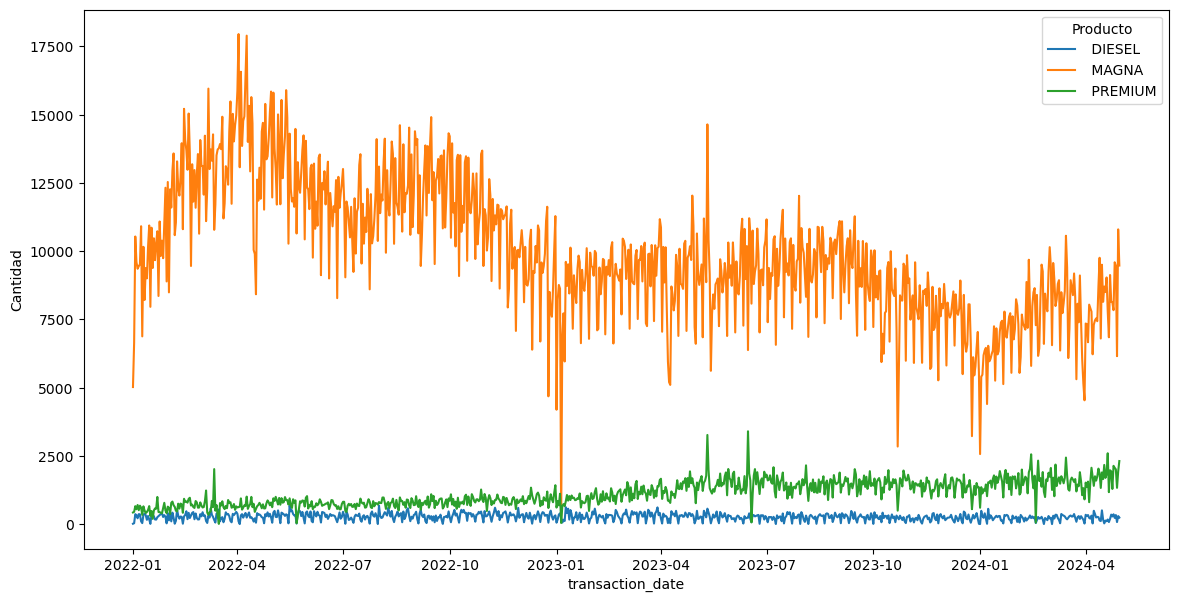

In [31]:
plt.figure(figsize = (14, 7))
sns.lineplot(data = grouped_date, x = 'transaction_date', y = 'Cantidad', hue = 'Producto')

<Axes: xlabel='Hour', ylabel='Day of Week'>

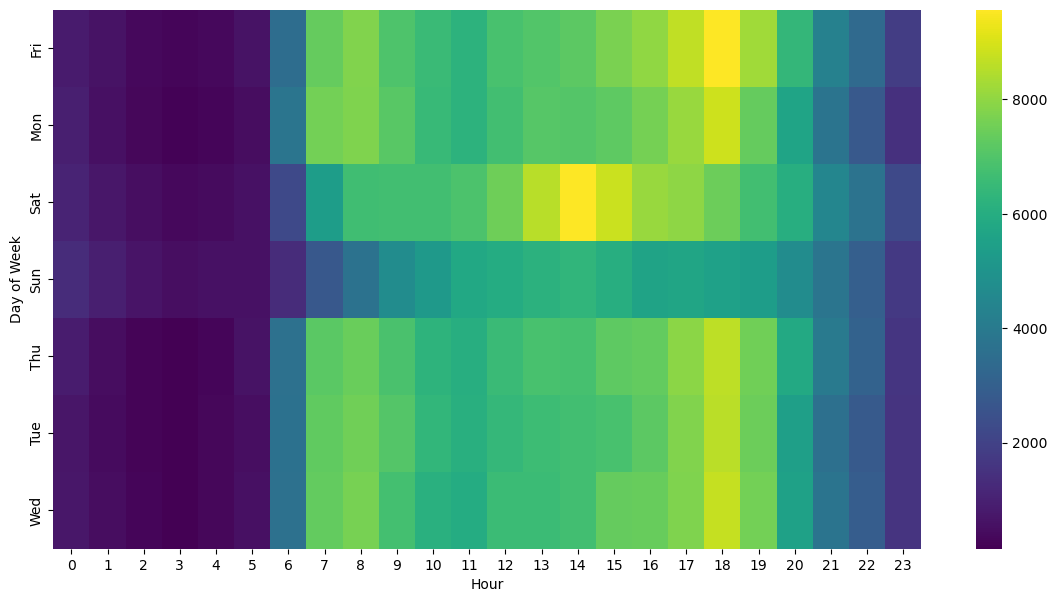

In [32]:
plt.figure(figsize = (14,7))
sns.heatmap(grouped_dayHour, cmap = 'viridis')

<Figure size 1400x700 with 0 Axes>

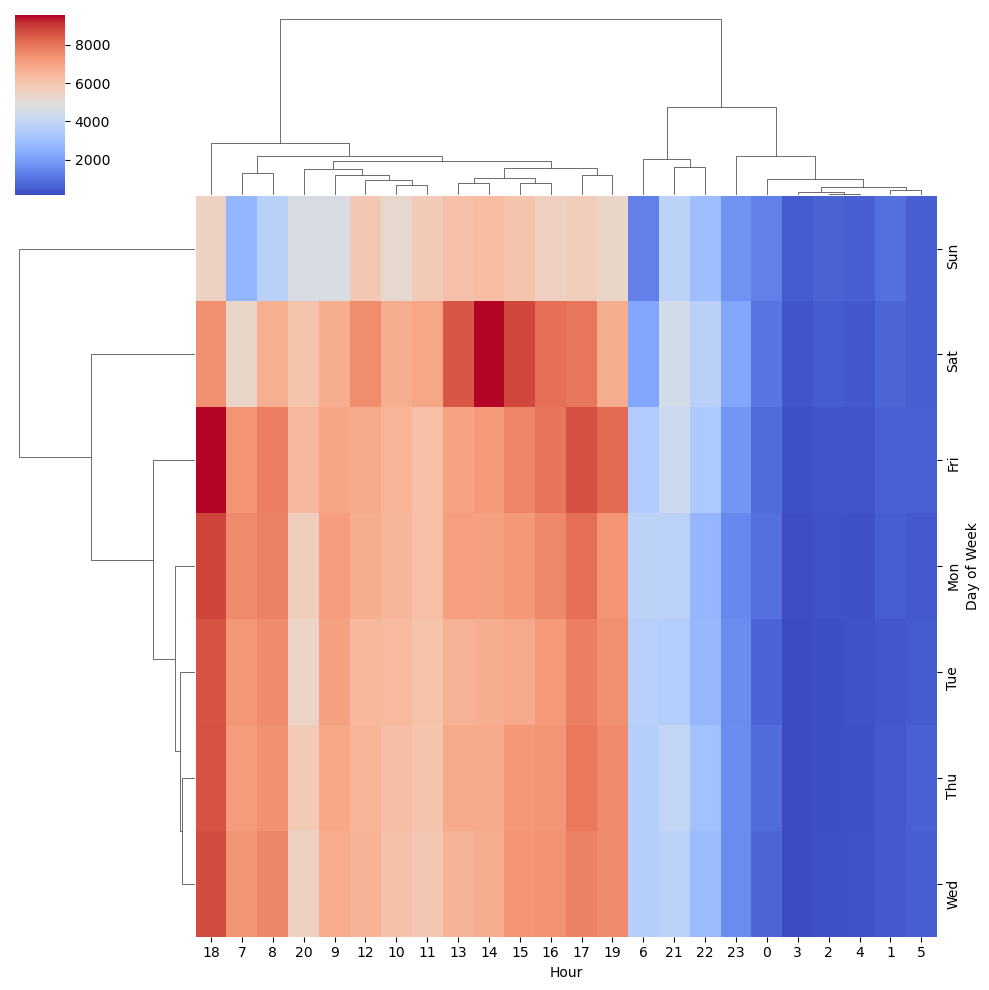

In [33]:
plt.figure(figsize = (14,7))
sns.clustermap(grouped_dayHour, cmap = 'coolwarm', method = 'centroid')

<Axes: xlabel='Month', ylabel='Day of Week'>

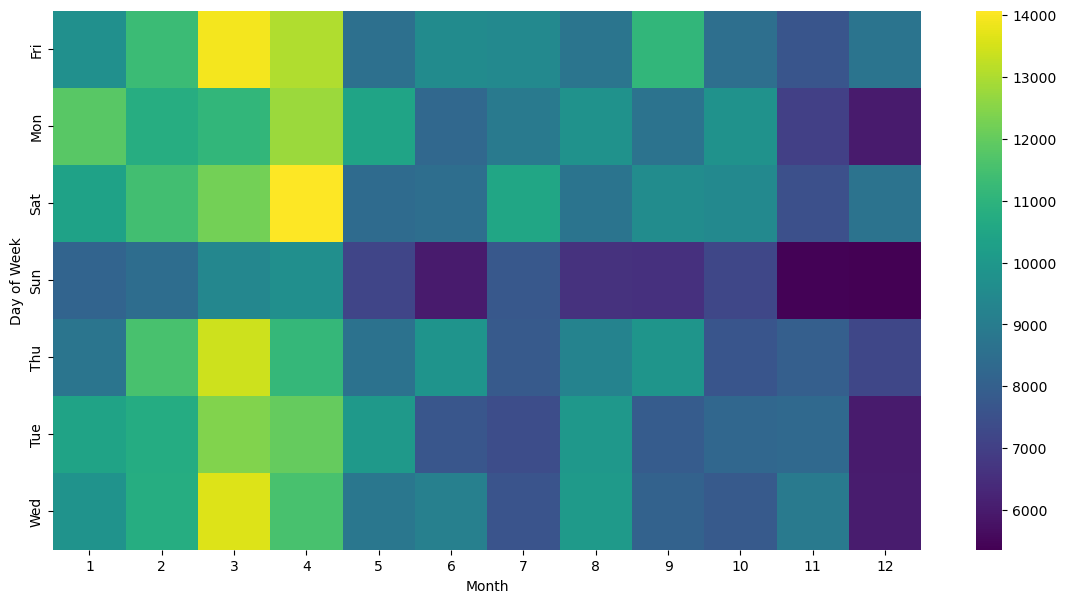

In [34]:
plt.figure(figsize = (14,7))
sns.heatmap(grouped_dayMonth,cmap = 'viridis')

<Figure size 1400x700 with 0 Axes>

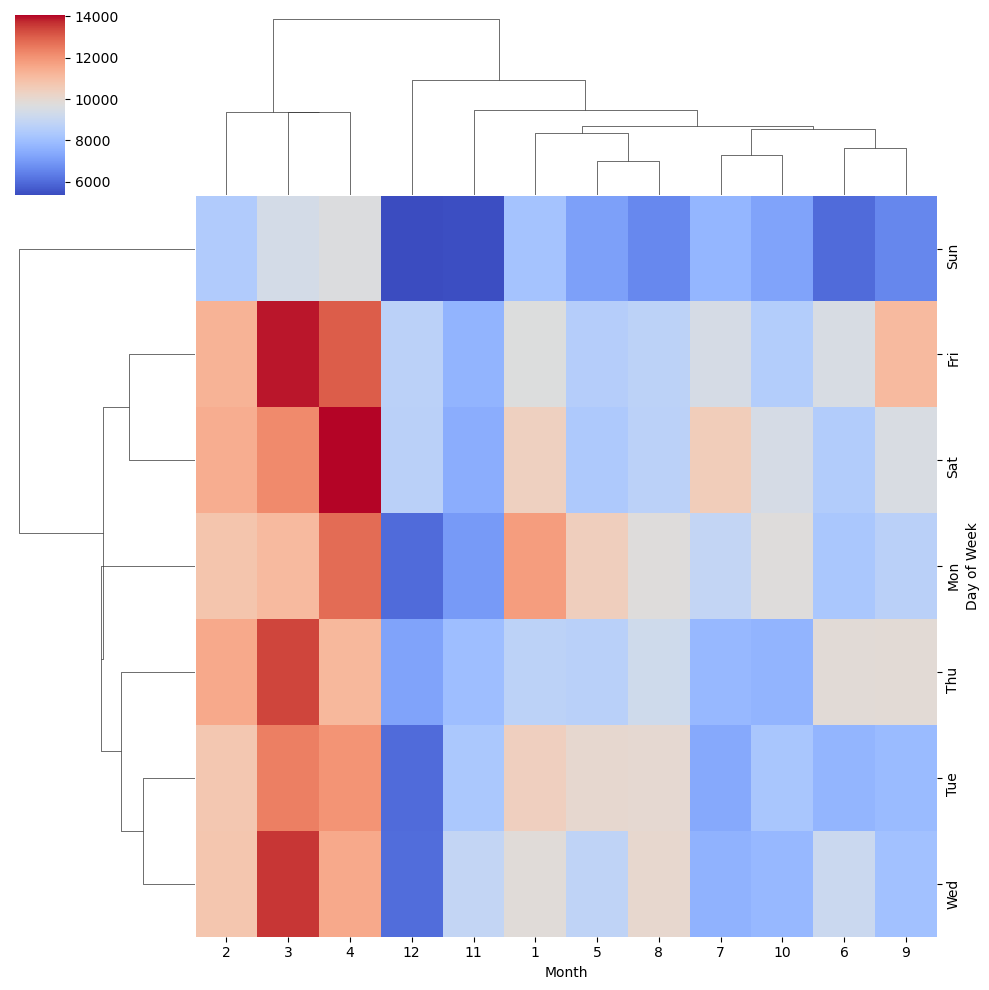

In [35]:
plt.figure(figsize = (14,7))
sns.clustermap(grouped_dayMonth,cmap = 'coolwarm', method = 'centroid')

In [65]:
df_dates = df_sales_filter[['transaction_date', 'Cantidad', 'Producto']].groupby(by = ['transaction_date', 'Producto']).sum().reset_index().set_index('transaction_date')
df_dates_magna = df_dates[df_dates['Producto'] == ' MAGNA']
df_dates_premium = df_dates[df_dates['Producto'] == ' PREMIUM']
df_dates_diesel = df_dates[df_dates['Producto'] == ' DIESEL']

In [66]:
if not isinstance(df_dates_magna.index, pd.DatetimeIndex):
    df_dates_magna.index = pd.to_datetime(df_dates_magna.index)

print("Start date:", df_dates_magna.index[0])
print("End date:", df_dates_magna.index[-1])
print("Number of data points:", len(df_dates_magna))

if df_dates_magna.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_magna)):
    if not df_dates_magna.index.freq:
        df_dates_magna.index.freq = 'D'

Start date: 2022-01-01 00:00:00
End date: 2024-04-30 00:00:00
Number of data points: 851


C:\Users\hzapi\AppData\Local\Temp\ipykernel_69316\4186441041.py:8: UserWarning: Discarding nonzero nanoseconds in conversion.
  if df_dates_magna.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_magna)):


In [67]:
if not isinstance(df_dates_premium.index, pd.DatetimeIndex):
    df_dates_premium.index = pd.to_datetime(df_dates_premium.index)

print("Start date:", df_dates_premium.index[0])
print("End date:", df_dates_premium.index[-1])
print("Number of data points:", len(df_dates_premium))

if df_dates_premium.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_premium)):
    if not df_dates_premium.index.freq:
        df_dates_premium.index.freq = 'D'

Start date: 2022-01-01 00:00:00
End date: 2024-04-30 00:00:00
Number of data points: 851


C:\Users\hzapi\AppData\Local\Temp\ipykernel_69316\858358222.py:8: UserWarning: Discarding nonzero nanoseconds in conversion.
  if df_dates_premium.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_premium)):


In [68]:
if not isinstance(df_dates_diesel.index, pd.DatetimeIndex):
    df_dates_diesel.index = pd.to_datetime(df_dates_diesel.index)

print("Start date:", df_dates_diesel.index[0])
print("End date:", df_dates_diesel.index[-1])
print("Number of data points:", len(df_dates_diesel))

if df_dates_diesel.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_diesel)):
    if not df_dates_diesel.index.freq:
        df_dates_diesel.index.freq = 'D'

Start date: 2022-01-01 00:00:00
End date: 2024-04-30 00:00:00
Number of data points: 837


C:\Users\hzapi\AppData\Local\Temp\ipykernel_69316\2509247466.py:8: UserWarning: Discarding nonzero nanoseconds in conversion.
  if df_dates_diesel.index[0] <= pd.Timestamp.max - pd.DateOffset(days = len(df_dates_diesel)):


ValueError: Inferred frequency None from passed values does not conform to passed frequency D

decomposition_magna = sm.tsa.seasonal_decompose(df_dates_magna['Cantidad'], model = 'additive')
fig = decomposition_magna.plot()
plt.show()

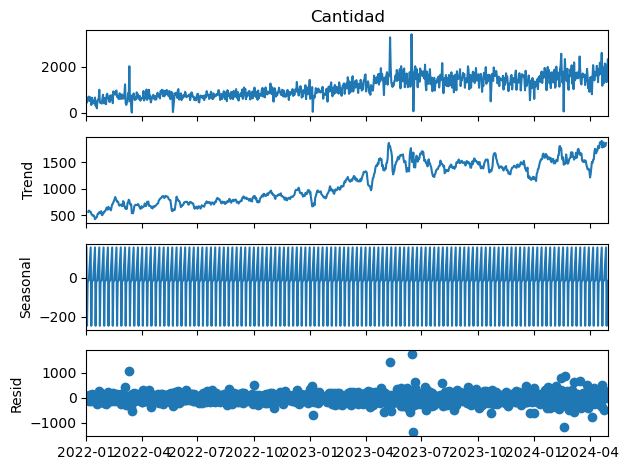

In [74]:
decomposition_premium = sm.tsa.seasonal_decompose(df_dates_premium['Cantidad'], model = 'additive')
fig = decomposition_premium.plot()
plt.show()

In [75]:
decomposition_diesel = sm.tsa.seasonal_decompose(df_dates_diesel['Cantidad'], model = 'additive')
fig = decomposition_diesel.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

**Conclusiones**

Para este análisis de la base de datos de nuestro Proyecto de Modelo para Optimización de Precios en Estaciones de Autoservicio tomamos como referencia la base diaria de ventas para el periodo 2022-2024 (abril). En primer lugar, consolidamos las bases de datos asegurándonos que cumplan con el tipo de dato correspondiente a la naturaleza de cada variable para poder analizar el contenido de la base de datos. 
Encontramos una gran cantidad de datos faltantes en variables relacionadas a información de los clientes de las gasolineras, como placa o tipo de vehículo, por lo cual no se podría realizar una segmentación de clientes de manera óptima, debido a que en algunos casos la data faltante representa alrededor del 70% de la base total. 

Las variables completas hacen referencia a información de la transacción de Ventas de 1 gasolinera, en la cual encontramos 3 variables numéricas, 2 variables categóricas, 2 variables que hacen referencia a la fecha de la transacción y 1 variable de identificación de la transacción. 
Encontramos valores atípicos que pueden deberse a una incorrecta digitación de la información (por ejemplo, una venta fue de 6 millones de galones) por lo cual decidimos filtrar el 10% de los valores más altos de la variable Cantidad para poder realizar el análisis exploratorio. 
En cuanto a información temporal, realizamos varios análisis gráficos de las series de tiempo y el principal hallazgo fue que la cantidad de combustible MAGNA (categoría de producto más vendido por la gasolinera) presenta una tendencia decreciente en el periodo analizado, mientras que la venta del combustible PREMIUM muestra una ligera tendencia creciente en el mismo periodo. 

Como nota adicional, una de las variables más importantes, el costo del combustible no fue entregada por parte de la empresa. Como equipo realizamos gestiones y recibimos parte de la base de datos y un compromiso de la empresa de entregar hasta el miércoles 8 de Mayo la base de datos completa de costos de combustible.